In [1]:
import pandas_profiling
%matplotlib inline
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pp_data = pd.read_csv("pp_data_2018_comp_final.csv")

In [3]:
pandas_profiling.ProfileReport(pp_data)

Number of variables,25
Number of observations,19267
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,200.0 B
Numeric,11
Categorical,8
Boolean,1
Date,0
Text (Unique),2
Rejected,3


In [4]:
pp_data.columns

Index(['title', 'sex', 'age', 'height_in', 'start_weight', 'end_weight',
       'weight_diff', 'score', 'num_comments', 'id', 'author', 'permalink',
       'timestamp', 'date', 'time', 'year', 'month', 'day', 'dayofweek',
       'ori_sex', 'height', 'num_height', 'ori_start_weight', 'ori_end_weight',
       'created_utc'],
      dtype='object')

In [5]:
# How many posters were male and female?
pp_data["sex"].value_counts()

F    10096
M     9171
Name: sex, dtype: int64

In [6]:
# What percentage of the posters were male and female
pp_data["sex"].value_counts()/pp_data["sex"].count()

F    0.524005
M    0.475995
Name: sex, dtype: float64

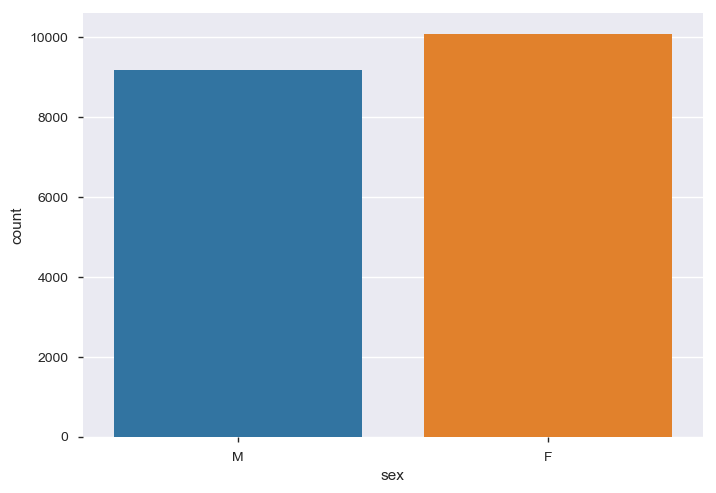

In [7]:
sns.countplot("sex", data=pp_data)

In [9]:
# Create separate dfs containing the male and female posters 
pp_males = pp_data[pp_data["sex"] == "M"]
pp_females = pp_data[pp_data["sex"] == "F"]

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


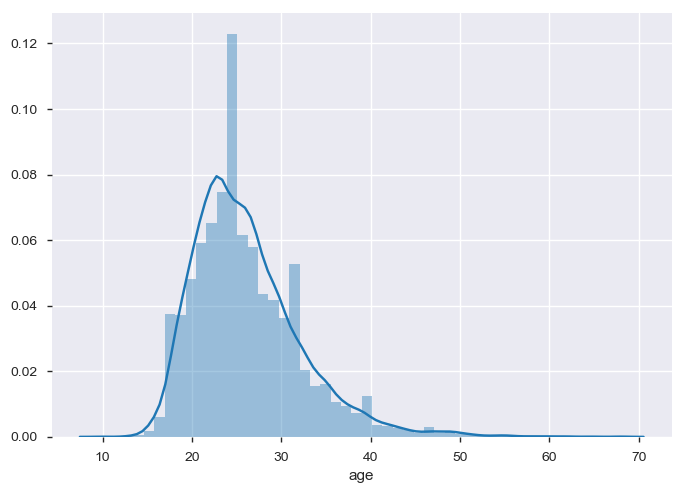

In [10]:
sns.distplot(pp_data["age"])

[Text(0,0.5,'counts'),
 Text(0.5,0,'age'),
 Text(0.5,1,'Histogram of the ages of progress_pic posters')]

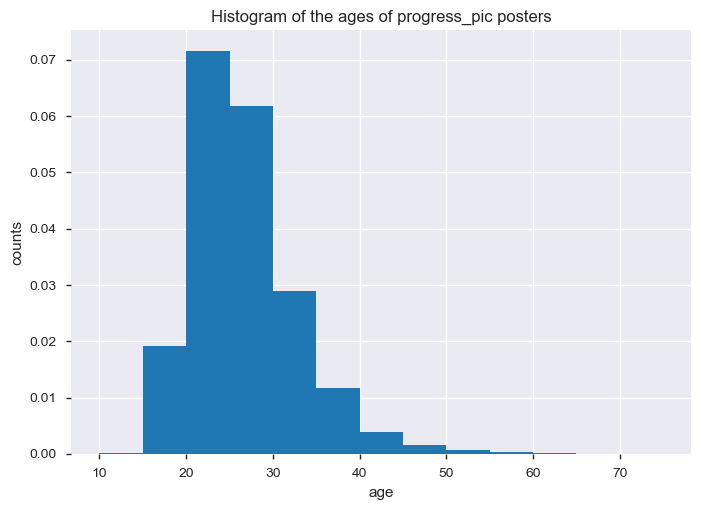

In [50]:
fig, ax = plt.subplots()
ax.hist(pp_data["age"], bins=np.arange(10, 80, 5), density="True")
ax.set(xlabel="age", ylabel="counts", title="Histogram of the ages of progress_pic posters")


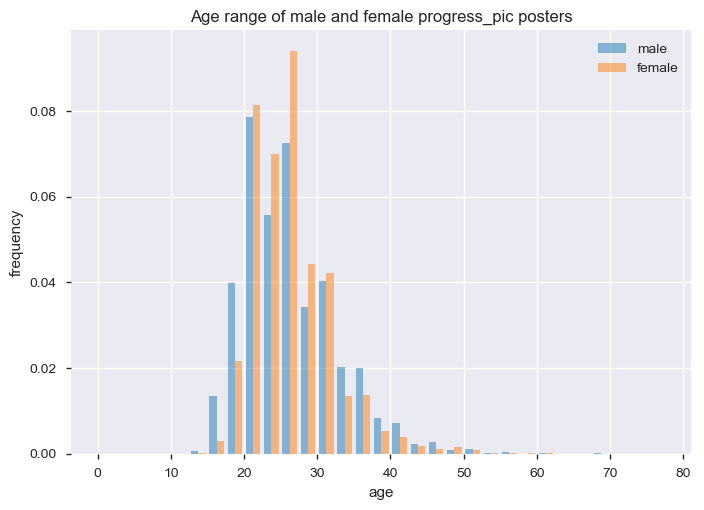

In [12]:
fig, ax = plt.subplots()
ax.hist([pp_males["age"], pp_females["age"]], label=["male", "female"], bins=np.arange(0, 80, 2.5), density=True, alpha=0.5)
ax.set(xlabel="age", ylabel="frequency", title="Age range of male and female progress_pic posters")
ax.legend()

# Why are the percentages so low? 

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


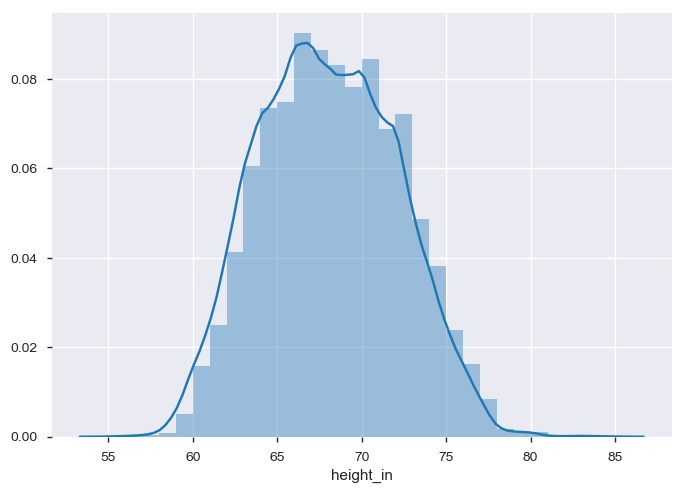

In [12]:
sns.distplot(pp_data["height_in"], bins=30)

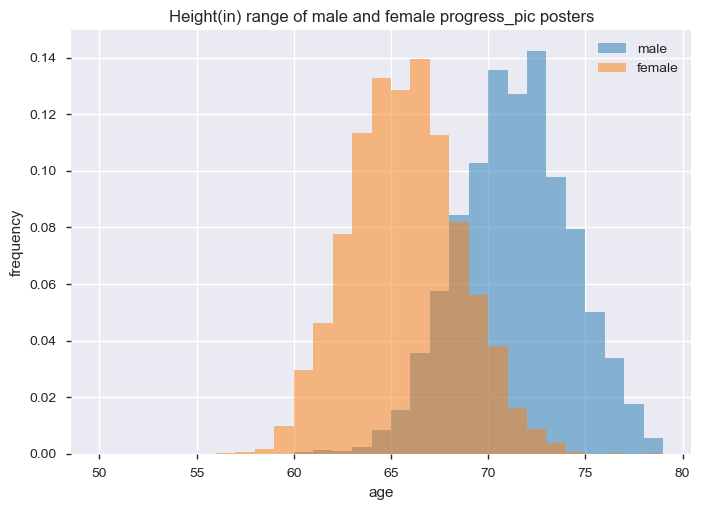

In [13]:
fig, ax = plt.subplots()
ax.hist(pp_males["height_in"], label=["male"], bins=np.arange(50, 80, 1), density=True, alpha=0.5)
ax.hist(pp_females["height_in"], label=["female"], bins=np.arange(50, 80, 1), density=True, alpha=0.5)
ax.set(xlabel="age", ylabel="frequency", title="Height(in) range of male and female progress_pic posters")
ax.legend()

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


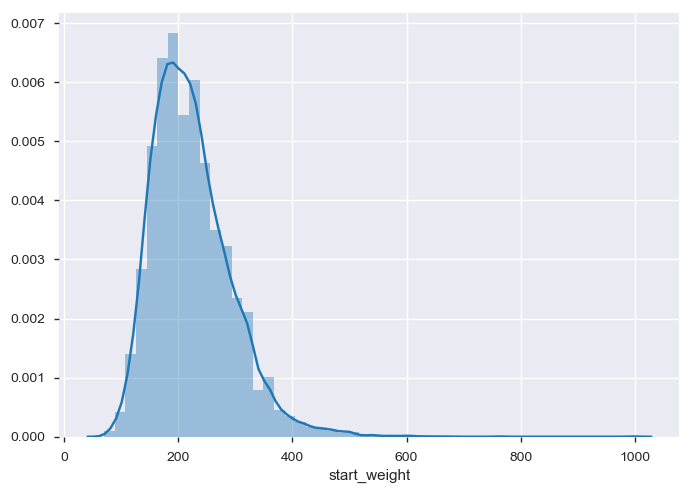

In [14]:
sns.distplot(pp_data["start_weight"])

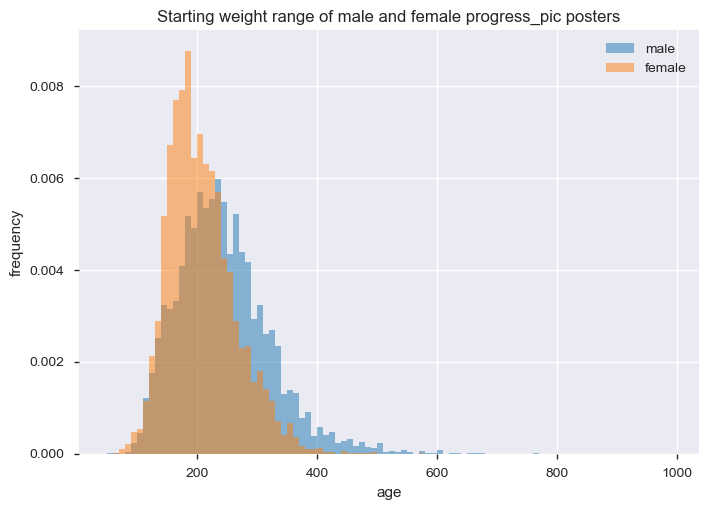

In [14]:

fig, ax = plt.subplots()
ax.hist(pp_males["start_weight"], label=["male"], bins = np.arange(50, 1000, 10), density=True, alpha=0.5)
ax.hist(pp_females["start_weight"], label=["female"], bins=np.arange(50, 1000, 10), density=True, alpha=0.5)
ax.set(xlabel="age", ylabel="frequency", title="Starting weight range of male and female progress_pic posters")
ax.legend()

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


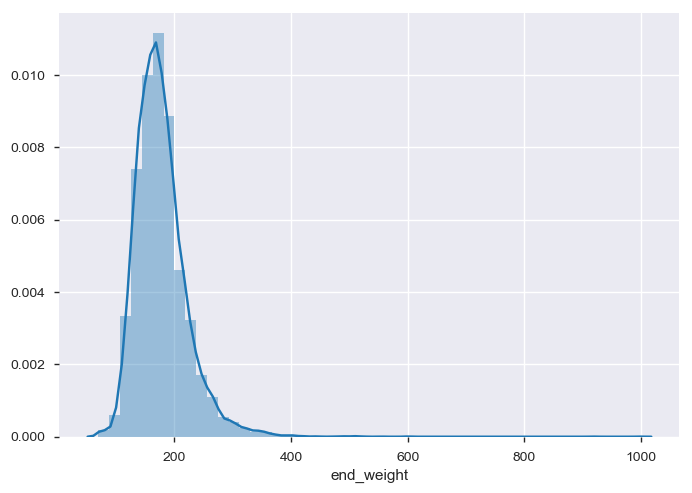

In [15]:
sns.distplot(pp_data["end_weight"])

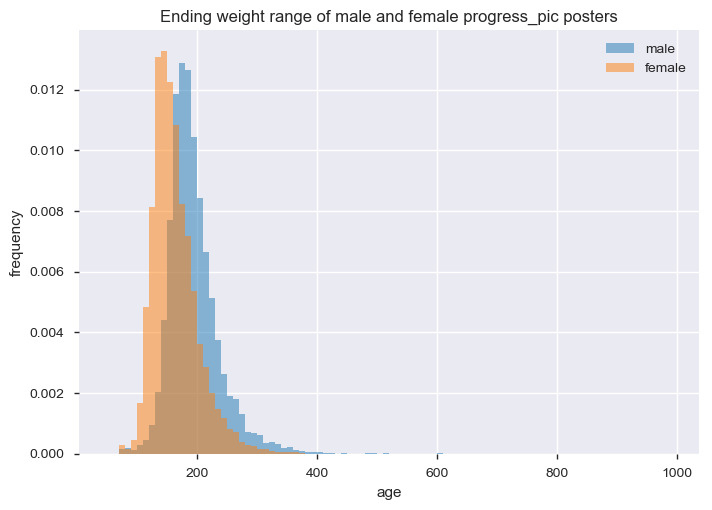

In [16]:
fig, ax = plt.subplots()
ax.hist(pp_males["end_weight"], label=["male"], bins = np.arange(50, 1000, 10), density=True, alpha=0.5)
ax.hist(pp_females["end_weight"], label=["female"], bins=np.arange(50, 1000, 10), density=True, alpha=0.5)
ax.set(xlabel="age", ylabel="frequency", title="Ending weight range of male and female progress_pic posters")
ax.legend()

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


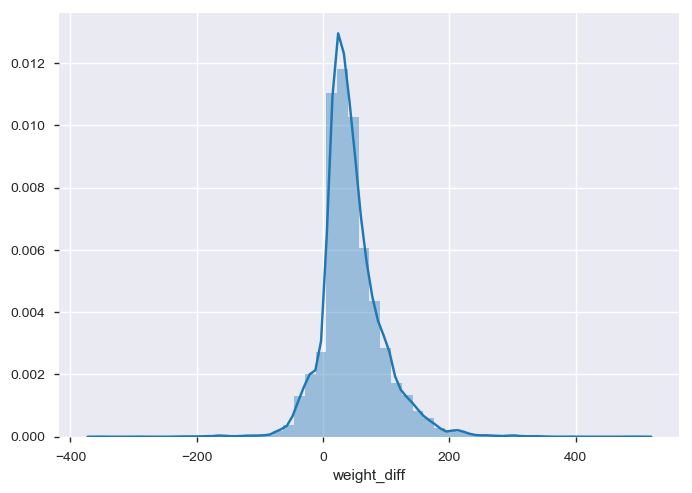

In [17]:
sns.distplot(pp_data["weight_diff"])

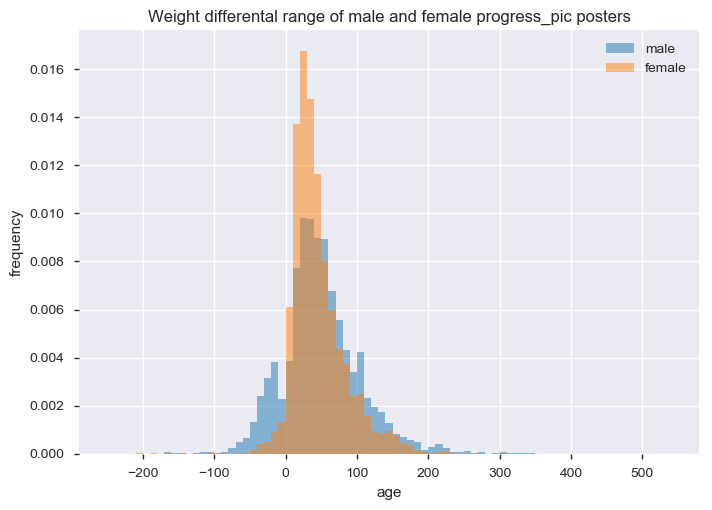

In [18]:
fig, ax = plt.subplots()
ax.hist(pp_males["weight_diff"], label=["male"], bins = np.arange(-250, 550, 10), density=True, alpha=0.5)
ax.hist(pp_females["weight_diff"], label=["female"], bins=np.arange(-250, 550, 10), density=True, alpha=0.5)
ax.set(xlabel="age", ylabel="frequency", title="Weight differental range of male and female progress_pic posters")
ax.legend()

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


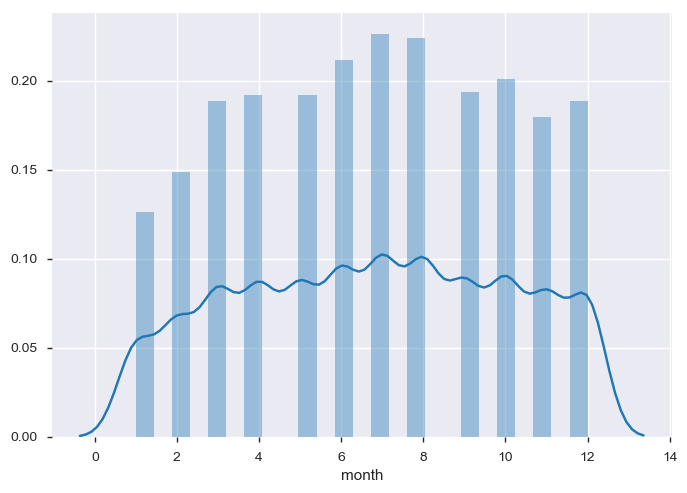

In [19]:
sns.distplot(pp_data["month"])

/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


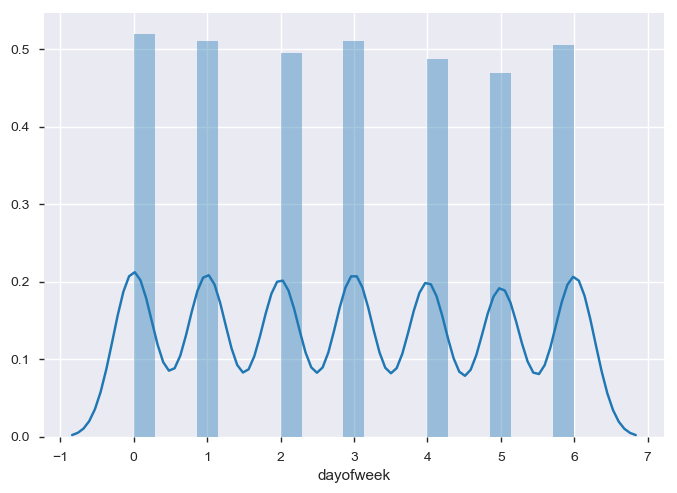

In [20]:
sns.distplot(pp_data["dayofweek"])

In [21]:
# How do the demographics of the progress_pics posters compare to reddit users and the general US population?
# First create a df that contains only adults. 
pp_adults = pp_data[pp_data["age"] >=18]

In [22]:
pp_adults.shape

(18863, 25)

In [23]:
pp_adults[(pp_adults["age"] >=18)&(pp_adults["age"] <=29)].shape[0]/pp_adults.shape[0]

0.7586280019084981

In [24]:
pp_adults[(pp_adults["age"] >=30)&(pp_adults["age"] <=39)].shape[0]/pp_adults.shape[0]

0.2081853363727933

In [25]:
pp_adults[(pp_adults["age"] >=50)&(pp_adults["age"] <=64)].shape[0]/pp_adults.shape[0]

0.005036314478078779

In [26]:
pp_adults[(pp_adults["age"] >=65)].shape[0]/pp_adults.shape[0]

0.00026506918305677784

In [27]:
# Adult demographic info from 2016:  https://www.techjunkie.com/demographics-reddit/

US_age_dict = {"18-29":  0.22, "30-39": 0.34, "50-64": 0.25, "65+": 0.19}
reddit_age_dict = {"18-29":  0.64, "30-39": 0.29, "50-64": 0.06, "65+": 0.01}
pp_age_dict = {"18-29":  0.7589, "30-39": 0.2080, "50-64": 0.005, "65+": 0.0003}

[Text(0,0.5,'frequency'),
 Text(0.5,0,'Age ranges'),
 Text(0.5,1,'Age demographics')]

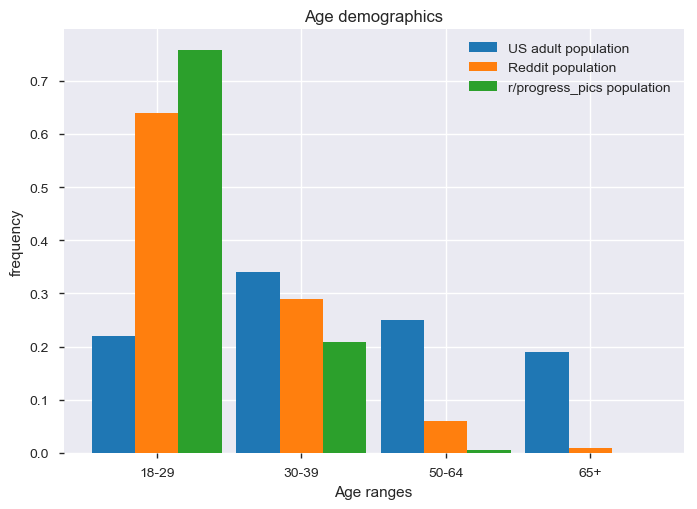

In [28]:
ind = np.arange(4)
width = 0.30

fig, ax = plt.subplots()
ax.bar(ind, list(US_age_dict.values()), width, align="center", label = "US adult population")
ax.bar(ind + width, list(reddit_age_dict.values()), width, align="center", label = "Reddit population")
ax.bar(ind + 2*width, list(pp_age_dict.values()), width, align="center", label = "r/progress_pics population")
ax.set_xticks(ind + width)
ax.set_xticklabels(list(US_age_dict.keys()))
ax.legend()
ax.set(title="Age demographics", xlabel="Age ranges", ylabel="frequency")

In [30]:
# How many posters lost weight, gained weight, stayed the same?

total_entries = pp_data['weight_diff'].count()

print("How many lost weight?")
print(pp_data[pp_data["weight_diff"] > 0]["weight_diff"].count())
print(pp_data[pp_data["weight_diff"] > 0]["weight_diff"].count()/total_entries)
print("How many gained weight?")
print(pp_data[pp_data["weight_diff"] < 0]["weight_diff"].count())
print(pp_data[pp_data["weight_diff"] < 0]["weight_diff"].count()/total_entries)
print("How many stayed the same?")
print(pp_data[pp_data["weight_diff"] == 0]["weight_diff"].count())  
print(pp_data[pp_data["weight_diff"] == 0]["weight_diff"].count()/total_entries)

How many lost weight?
17328
0.899361602740437
How many gained weight?
1731
0.08984273628483937
How many stayed the same?
208
0.01079566097472362


In [31]:
# Create separate dfs for the posters who lost weight and gained weight. 
pp_lost = pp_data[pp_data["weight_diff"] > 0]
pp_gain = pp_data[pp_data["weight_diff"] < 0]

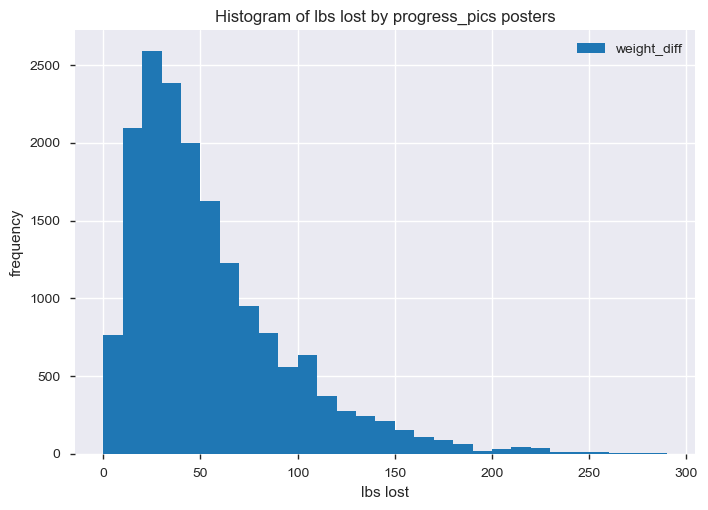

In [32]:
fig, ax = plt.subplots()
ax.hist(pp_lost["weight_diff"], bins = np.arange(0, 300, 10))
ax.set(xlabel="lbs lost", ylabel="frequency", title="Histogram of lbs lost by progress_pics posters")
ax.legend()

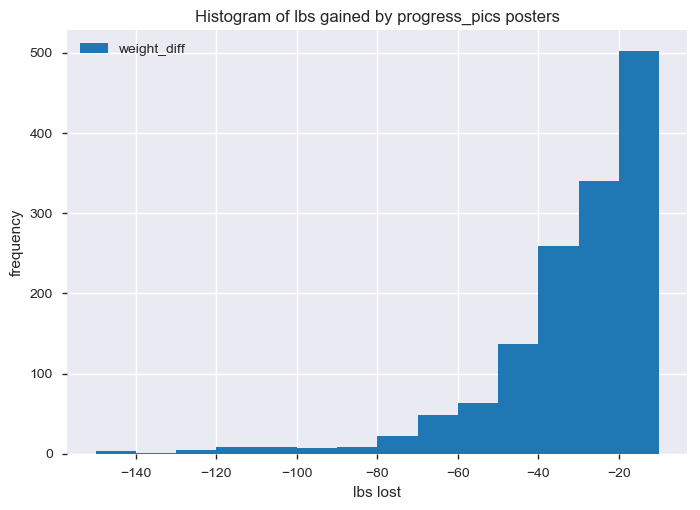

In [33]:
fig, ax = plt.subplots()
ax.hist(pp_gain["weight_diff"], bins = np.arange(-150, 0, 10))
ax.set(xlabel="lbs lost", ylabel="frequency", title="Histogram of lbs gained by progress_pics posters")
ax.legend()

In [34]:
# How many posters posted more than once during the year? 

print("Number of entries by multiple time posters")
print(pp_data.groupby('author').filter(lambda x: len(x) >= 2)["author"].count())
print("Number of entries by single time posters")
print(pp_data.groupby('author').filter(lambda x: len(x) == 1)["author"].count())

Number of entries by multiple time posters
11895
Number of entries by single time posters
7372


In [35]:
# Create separate dfs for the posters who posted once and those who posted multiple times. 
pp_single = pp_data.groupby('author').filter(lambda x: len(x) == 1)
pp_multiple = pp_data.groupby('author').filter(lambda x: len(x) >= 2)

In [36]:
# How many times did the most frequent poster post? 
pp_multiple["author"].value_counts().head()

[deleted]              6506
Wendyjay34               17
violicorn                15
traumathrowawayacc       14
MotorBoatinSumBitch      13
Name: author, dtype: int64

In [37]:
deleted = pp_data[pp_data["author"]=='[deleted]']
print(deleted.shape)
print(pp_single.shape)
print(pp_multiple.shape)

(6506, 25)
(7372, 25)
(11895, 25)


In [38]:
# okay...turns out 6486 of those multiple poster entries are where the author name was deleted.
# need to fix the single and multiple dataframes so that the [deleted] authors are included in the single poster df. 
deleted = pp_data[pp_data["author"]=='[deleted]']
pp_single = pd.concat([pp_single, deleted])

In [43]:
pp_multiple = pp_multiple[pp_multiple["author"] != '[deleted]']

In [44]:
# Are they fixed?
print(pp_single.shape)
print(pp_multiple.shape)

(13878, 25)
(5389, 25)


In [45]:
print("How many authors posted more than once to progress pics?")
print(pp_multiple["author"].value_counts().shape[0])

How many authors posted more than once to progress pics?
1993


In [46]:
print("On average, how many times did multiple posters post?")
print(pp_multiple['author'].value_counts().mean())

On average, how many times did multiple posters post?
2.703963873557451


In [47]:
# Who posted the most?
pp_multiple['author'].value_counts().sort_values(ascending=False).head()

Wendyjay34             17
violicorn              15
traumathrowawayacc     14
MotorBoatinSumBitch    13
Wicho1042              12
Name: author, dtype: int64

In [49]:
Wendyjay = pp_multiple[pp_multiple['author']=="Wendyjay34"]
Wendyjay

,title,sex,age,height_in,start_weight,end_weight,weight_diff,score,num_comments,id,...,year,month,day,dayofweek,ori_sex,height,num_height,ori_start_weight,ori_end_weight,created_utc
3,F/48/5’6” [326 lbs &gt; 180lbs= 146 lbs lost] ...,F,48,66.0,326.0,180.0,146.0,3163.0,144.0,7rvoaj,...,2018,1,20,5,F,5’6”,56,326,180,1.516509e+09
5,F/48/5’6” [325 lbs &gt; 180 lbs = 146 lbs lost...,F,48,66.0,325.0,180.0,145.0,786.0,53.0,7rvzoj,...,2018,1,20,5,F,5’6”,56,325,180,1.516513e+09
1264,F/49/5’6”[326 lbs &gt;180 lbs =-146 lbs] (102 ...,F,49,66.0,326.0,146.0,180.0,1262.0,79.0,7v7fm3,...,2018,2,4,6,F,5’6”,56,326,146,1.517759e+09
1591,F/49/5’6” [326 lbs &gt; 179 lbs= -147 lbs] (10...,F,49,66.0,326.0,147.0,179.0,1976.0,80.0,7wgktj,...,2018,2,9,4,F,5’6”,56,326,147,1.518210e+09
3940,F/49/5’6” [326&gt;185= 141lbs] (103 months) I ...,F,49,66.0,326.0,185.0,141.0,3541.0,161.0,8a8nhd,...,2018,4,6,4,F,5’6”,56,326,185,1.523013e+09
5459,F/49/5’6” [326&gt;179 = 147 lbs lost] (104 mon...,F,49,66.0,326.0,179.0,147.0,2163.0,79.0,8nkdq7,...,2018,5,31,3,F,5’6”,56,326,179,1.527788e+09
5567,F/49/5’6” [326 &gt; 179 =147 lbs lost] (104 mo...,F,49,66.0,326.0,179.0,147.0,820.0,48.0,8nlmq0,...,2018,5,31,3,F,5’6”,56,326,179,1.527797e+09
7028,F/49/5’6”[326&gt;183= -143lbs] (2010 until tod...,F,49,66.0,326.0,143.0,183.0,289.0,41.0,8rk7ps,...,2018,6,16,5,F,5’6”,56,326,143,1.529164e+09
8515,F/49/5’6”[326.5&gt;178.4]=-148.1lbs (8 years) ...,F,49,66.0,326.0,148.0,178.0,279.0,16.0,8tq3it,...,2018,6,25,0,F,5’6”,56,326,148,1.529930e+09
8994,F/49/5’6” [326lbs &gt; 178lbs = -148] (about 8...,F,49,66.0,326.0,148.0,178.0,7913.0,363.0,907s20,...,2018,7,19,3,F,5’6”,56,326,148,1.532020e+09


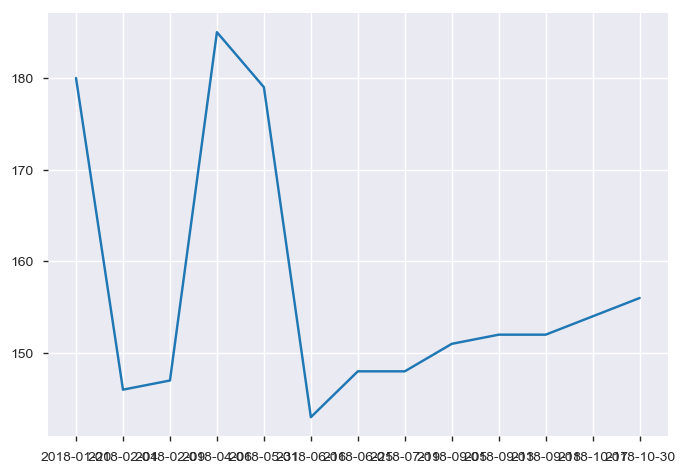

In [132]:
fig, ax = plt.subplots()
ax.plot(Wendyjay['date'], Wendyjay["end_weight"])

Just looking at WendyJay34's entries really indicates how my data processing is going awry.  The main problem is the 
regex skips the true end_weight and takes a number from later in the title.  Why?  